In [1]:
import os, sys
import numpy as np
import pyvista as pv
import matplotlib.pyplot as plt
from scipy.constants import c as c_light
from tqdm import tqdm

from wakis import SolverFIT3D
from wakis import GridFIT3D 
from wakis import WakeSolver

Matplotlib is building the font cache; this may take a moment.


In [ ]:
nmesh = [1, 3, 5, 7, 10, 15, 20, 25]

for n in nmesh:
    results_folder = f'results_wl10_{n}Mcells_T416Gb_float32/'
    print(f'Simulating with Ncells: {n} million')
    print('-------------------------------------')

    # ---------- Domain setup ---------
    # Number of mesh cells
    Nx = 100
    Ny = 100
    Nz = 100*n
    #dt = 2.187760221e-12 # CST
    
    # Embedded boundaries
    stl_cavity = 'cav.stl' 
    stl_shell = 'shell.stl'
    surf = pv.read(stl_shell)
    #surf.plot()
    
    stl_solids = {'cavity': stl_cavity, 'shell': stl_shell}
    stl_materials = {'cavity': 'vacuum', 'shell': [30, 1.0, 30]}
    
    # Domain bounds
    xmin, xmax, ymin, ymax, zmin, zmax = surf.bounds
    Lx, Ly, Lz = (xmax-xmin), (ymax-ymin), (zmax-zmin)
    
    # set grid and geometry
    grid = GridFIT3D(xmin, xmax, ymin, ymax, zmin, zmax, Nx, Ny, Nz, 
                    stl_solids=stl_solids, 
                    stl_materials=stl_materials,
                    stl_scale=1.0)
        
    # ------------ Beam source ----------------
    # Beam parameters
    beta = 0.8          # beam beta 
    sigmaz = 10e-2*beta      #[m] -> 2 GHz
    q = 1e-9            #[C]
    xs = 0.             # x source position [m]
    ys = 0.             # y source position [m]
    xt = 0.             # x test position [m]
    yt = 0.             # y test position [m]
    # [DEFAULT] tinj = 8.53*sigmaz/c_light  # injection time offset [s] 
    
    # Simualtion
    wakelength = 2. #[m]
    add_space = 15   # no. cells
    
    wake = WakeSolver(q=q, sigmaz=sigmaz, beta=beta,
                xsource=xs, ysource=ys, xtest=xt, ytest=yt,
                add_space=add_space, results_folder=results_folder,
                Ez_file=results_folder+'Ez.h5')
    
    # ----------- Solver & Simulation ----------
    # boundary conditions``
    bc_low=['pec', 'pec', 'pec']
    bc_high=['pec', 'pec', 'pec']
    
    solver = SolverFIT3D(grid, wake, #dt=dt,
                         bc_low=bc_low, bc_high=bc_high, 
                         use_stl=True, 
                         use_gpu=True,
                         dtype=np.float32,
                         bg='pec')
    # Plot settings
    if not os.path.exists('img/'): os.mkdir('img/')
    from matplotlib.colors import LinearSegmentedColormap
    cmap = LinearSegmentedColormap.from_list('name', plt.cm.jet(np.linspace(0.1, 0.9))) # CST's colormap
    
    plotkw2D = {'title':'img/Ez', 
                'add_patch':['cavity'], 'patch_alpha':1.0,
                'patch_reverse' : True, 
                'vmin':-1e3, 'vmax':1e3,
                'cmap': cmap,
                'plane': [int(Nx/2), slice(0, Ny), slice(add_space, -add_space)]}
    
    plotkw3D = {'title':'img/Ez3d', 
                'add_stl':'shell',
                'field_opacity':0.5,}

    # Run 1000 timesteps
    # for n in tqdm(range(1000)):
    #     solver.one_step()
    # solver.reset_fields()
    
    # Run wakefield time-domain simulation
    solver.wakesolve(wakelength=wakelength, add_space=add_space,
                    plot=False, plot_every=30, plot_until=3000,
                    save_J=False, **plotkw2D)

    print(' ')

Simulating with Ncells: 1 million
-------------------------------------
Generating grid...
Importing STL solids...
Assembling operator matrices...
Applying boundary conditions...
Adding material tensors...
Calculating maximal stable timestep...
Pre-computing...
Moving to GPU...
Total initialization time: 11.105565309524536 s
Running electromagnetic time-domain simulation...


100%|██████████| 2661/2661 [01:27<00:00, 30.53it/s] 


Reading h5 file results_wl10_1Mcells_T416Gb_float32/Ez.h5
Calculating longitudinal wake potential WP(s)


100%|██████████| 18621/18621 [00:05<00:00, 3250.31it/s]


Calculating transverse wake potential WPx, WPy...


100%|██████████| 18621/18621 [00:00<00:00, 163063.37it/s]


Calculating longitudinal impedance Z...
Calculating transverse impedance Zx, Zy...
 
Simulating with Ncells: 3 million
-------------------------------------
Generating grid...
Importing STL solids...
Assembling operator matrices...
Applying boundary conditions...
Adding material tensors...
Calculating maximal stable timestep...
Pre-computing...
Moving to GPU...
Total initialization time: 57.5532910823822 s
Running electromagnetic time-domain simulation...


100%|██████████| 4125/4125 [00:51<00:00, 80.40it/s]


Reading h5 file results_wl10_3Mcells_T416Gb_float32/Ez.h5
Calculating longitudinal wake potential WP(s)


100%|██████████| 28818/28818 [00:17<00:00, 1622.76it/s]


Calculating transverse wake potential WPx, WPy...


100%|██████████| 28818/28818 [00:00<00:00, 152868.90it/s]


Calculating longitudinal impedance Z...
Calculating transverse impedance Zx, Zy...
 
Simulating with Ncells: 5 million
-------------------------------------
Generating grid...
Importing STL solids...
Assembling operator matrices...
Applying boundary conditions...
Adding material tensors...
Calculating maximal stable timestep...
Pre-computing...
Moving to GPU...
Total initialization time: 147.29771494865417 s
Running electromagnetic time-domain simulation...


100%|██████████| 6071/6071 [02:17<00:00, 44.15it/s]


Reading h5 file results_wl10_5Mcells_T416Gb_float32/Ez.h5
Calculating longitudinal wake potential WP(s)


100%|██████████| 42399/42399 [00:39<00:00, 1083.23it/s]


Calculating transverse wake potential WPx, WPy...


100%|██████████| 42399/42399 [00:00<00:00, 151156.91it/s]


Calculating longitudinal impedance Z...
Calculating transverse impedance Zx, Zy...
 
Simulating with Ncells: 7 million
-------------------------------------
Generating grid...
Importing STL solids...
Assembling operator matrices...
Applying boundary conditions...
Adding material tensors...
Calculating maximal stable timestep...
Pre-computing...
Moving to GPU...


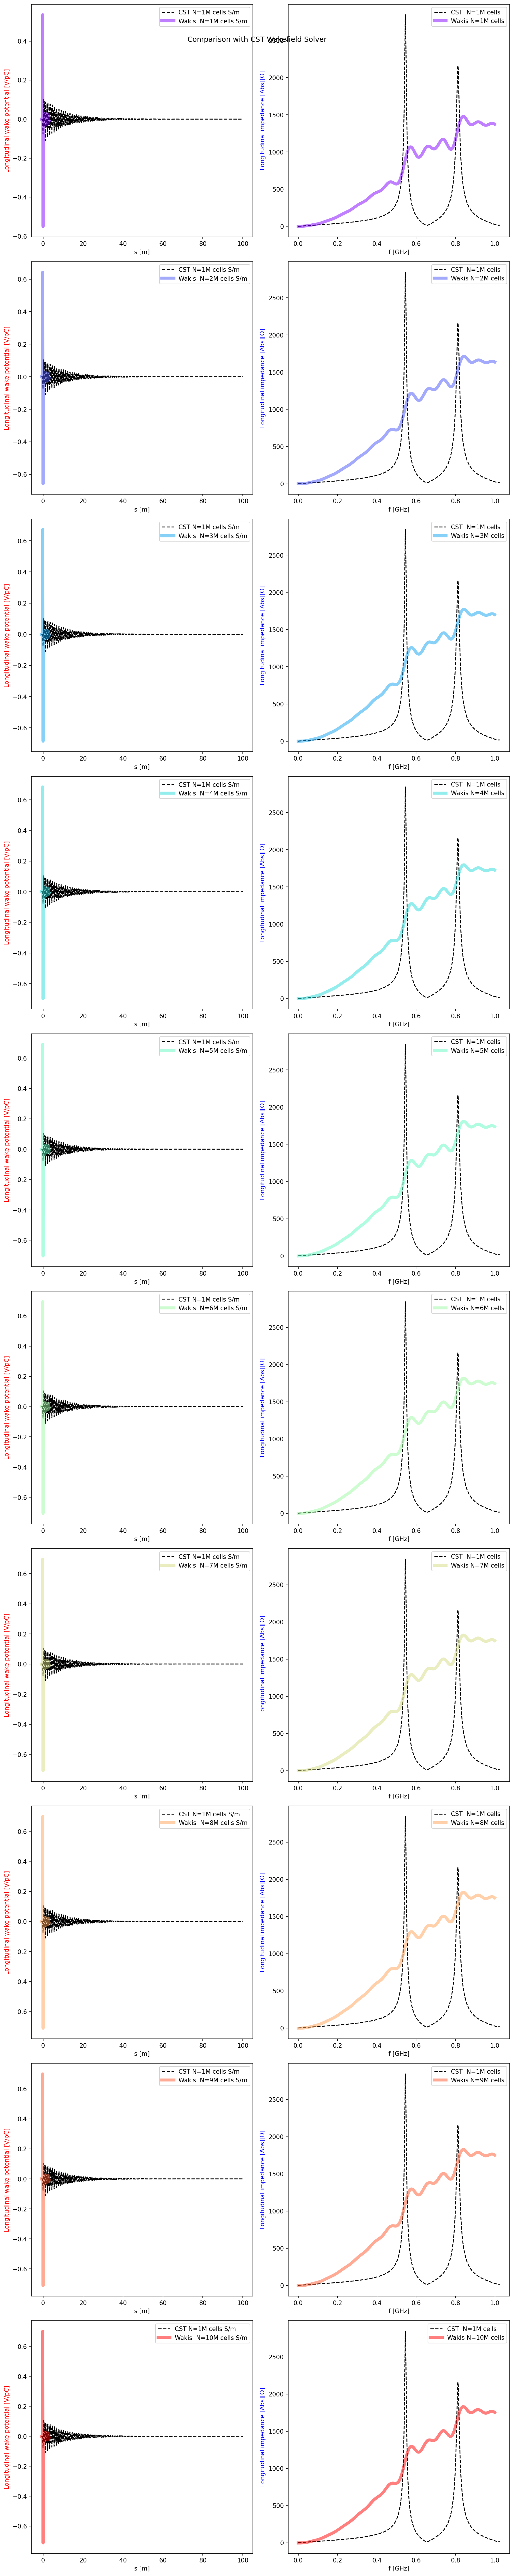

In [5]:
# CST wake
wake = WakeSolver()
nmesh = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
res = {}
res2 = {}

cstWP = wake.read_txt('cst/WP_wl10000.txt')
cstZ = wake.read_txt('cst/Z_wl10000.txt')

import matplotlib as mpl
colors = mpl.colormaps['rainbow'](np.linspace(0., 1.0, len(nmesh)))
fig, ax = plt.subplots(len(nmesh),2, figsize=[12,6*len(nmesh)], dpi=150)

for k, n in enumerate(nmesh):
    res[k] = wake.copy()
    res[k].load_results(f'results_wl10_{n}Mcells_10GbA100_float32/')

    #res2[k] = wake.copy()
    #res2[k].load_results(f'results_wl10_{n}Mcells_10GbA100/')
    
    ax[k][0].plot(cstWP[0]*1e-2, cstWP[1], c='k', ls='--', lw=1.5, label=f'CST N=1M cells S/m')
    ax[k][0].plot(res[k].s, res[k].WP, c=colors[k], lw=5, alpha=0.5, label=f'Wakis  N={n}M cells S/m')
    #ax[k][0].plot(res2[k].s, res2[k].WP, c=colors[k], ls='-', lw=1.5, alpha=0.8, label=f'Wakis float32  N={n}M cells')

    ax[k][1].plot(cstZ[0], cstZ[1], c='k', ls='--', lw=1.5, label=f'CST  N=1M cells')
    ax[k][1].plot(res[k].f*1e-9, res[k].Z.real, c=colors[k], lw=5, alpha=0.5, label=f'Wakis N={n}M cells')
    #ax[k][1].plot(res2[k].f*1e-9, res2[k].Z.real, c=colors[k], ls='-', lw=1.5, alpha=0.8, label=f'Wakis float32 N={n}M cells')

    ax[k][0].set_xlabel('s [m]')
    ax[k][0].set_ylabel('Longitudinal wake potential [V/pC]', color='r')
    ax[k][0].legend()
    
    ax[k][1].set_xlabel('f [GHz]')
    ax[k][1].set_ylabel('Longitudinal impedance [Abs][$\Omega$]', color='b')
    ax[k][1].legend()
    
fig.suptitle('Comparison with CST Wakefield Solver')
fig.tight_layout()
fig.savefig(f'comparison.png')